Valentín Pertierra

### TP2 Visión por computadora



Implementar la función create_gauss_filter (h, w, k_size, sigma) para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.
2. Usando el método descripto en el paper Image Sharpness Measure for Blurred Images in Frequency Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of focus measure operators in shape from focus”

In [129]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('chewbacca.jpg', cv.IMREAD_GRAYSCALE)
#img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)

print(img.shape)

(756, 1200)


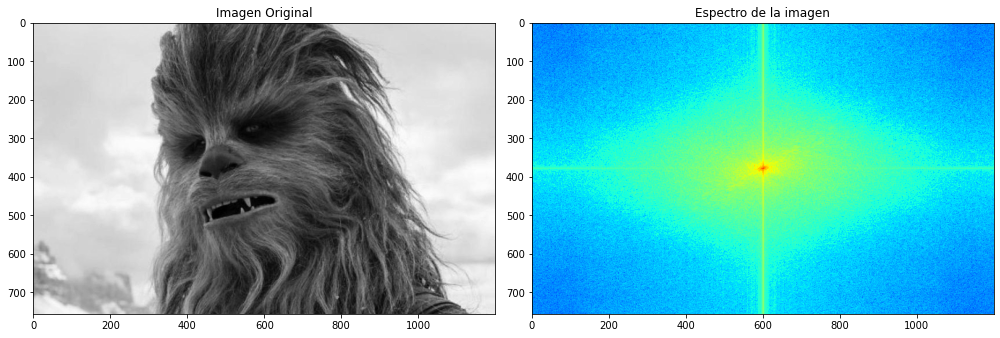

In [130]:
# Grafico la imagen original con su  espectro 
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
plt.title(f'Imagen Original')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title(f'Espectro de la imagen')

img_fft = np.fft.fftshift(np.fft.fft2(img))
plt.imshow(20*np.log(np.abs(img_fft)), cmap='jet')

plt.tight_layout()


In [131]:
# Implementacion de la funcion create_gauss_filter(h, w, k_size, sigma)
def create_gauss_filter(h, w, k_size, sigma):
    
    # Genero el kernel gaussiano
    kernel = np.zeros((h, w))
    
    kernel_1d = cv.getGaussianKernel(k_size, sigma)
    kernel_2d = kernel_1d * kernel_1d.T
    
    h_ini = (h-k_size)//2
    w_ini = (w-k_size)//2
    
    kernel[h_ini:h_ini+k_size,w_ini:w_ini+k_size] = kernel_2d
   
    # Obtengo la transformada de Fourier
    kernel_tf = np.fft.fft2(kernel)
    
    return kernel, kernel_tf 

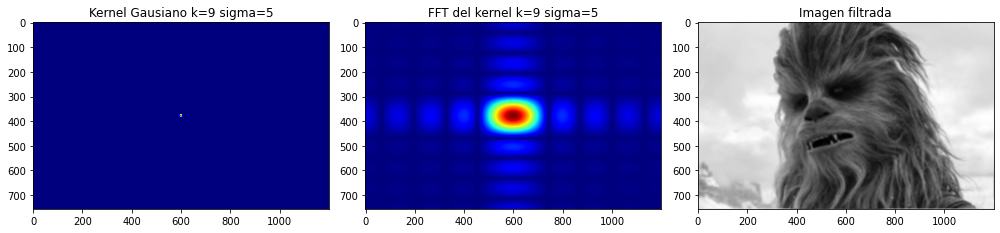

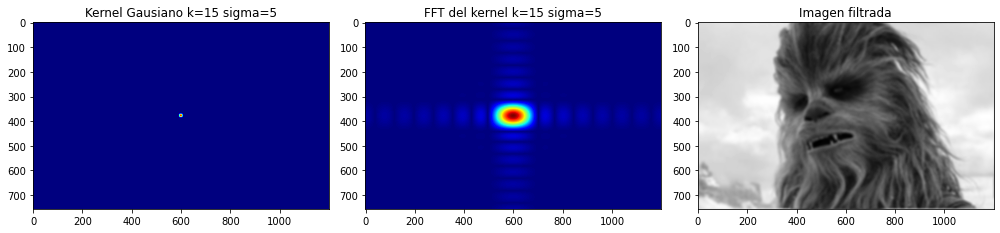

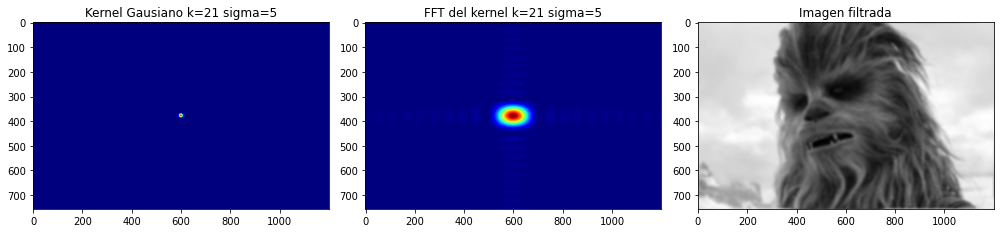

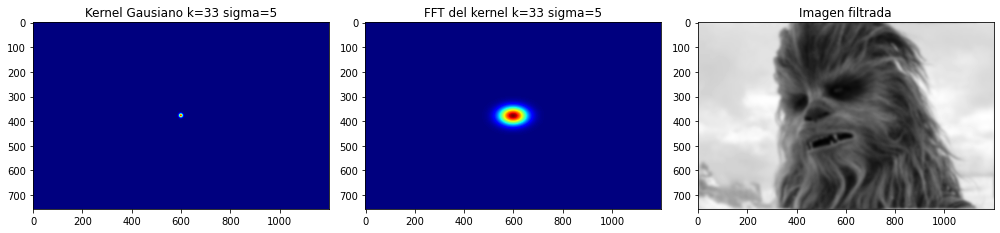

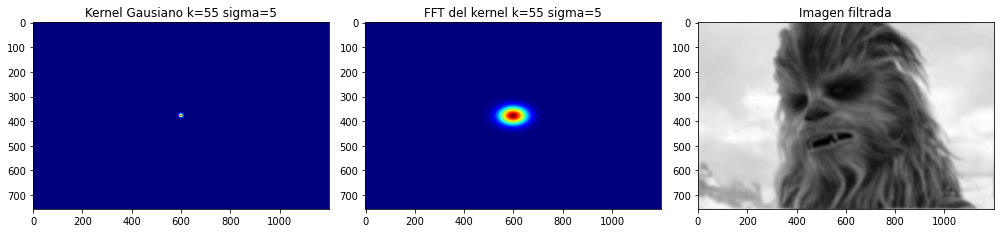

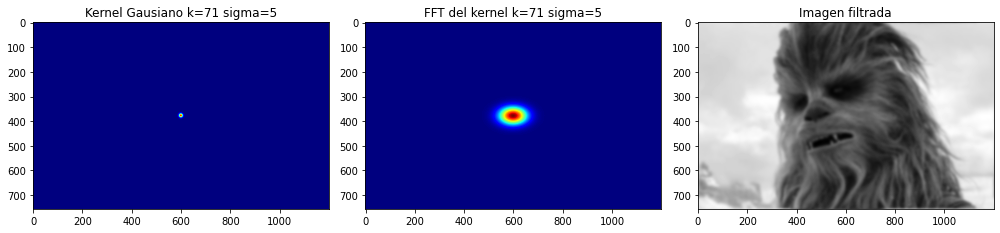

In [132]:
h, w = img.shape
k_size = [9, 15, 21, 33, 55, 71]
sigma = 5
images_tf = []

for k in k_size:
    
    kernel, kernel_tf = create_gauss_filter(h, w, k, sigma)
    
    # Filtro la imagen utilizando la transformada de fourier del kernel 
    img_fft = np.fft.fft2(img)
    filtered = img_fft * kernel_tf
    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))
    
    images_tf.append([filtered, img_gauss])
    
    plt.figure(figsize=(14,8))

    plt.subplot(1,3,1)
    plt.title(f'Kernel Gausiano k={k} sigma={sigma}')
    plt.imshow(kernel, cmap='jet')

    plt.subplot(1,3,2)
    plt.title(f'FFT del kernel k={k} sigma={sigma}')
    tf_shifted = np.fft.fftshift(kernel_tf)
    plt.imshow(np.abs(tf_shifted), cmap='jet')
    
    plt.subplot(1,3,3)
    plt.title(f'Imagen filtrada')
    plt.imshow(img_gauss, cmap='gray')
    
    plt.tight_layout()



Para los mismos valores grafico la imgen filtrada con sus espectros

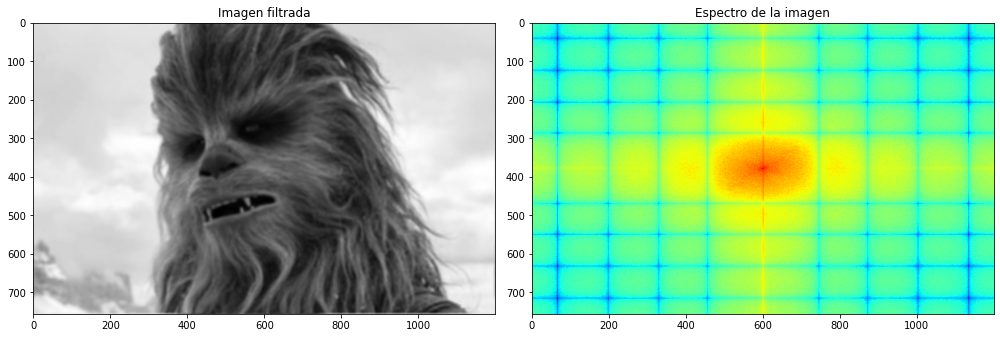

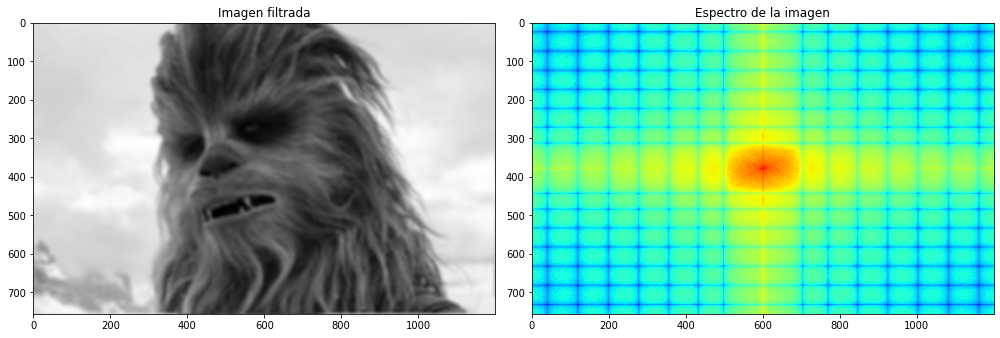

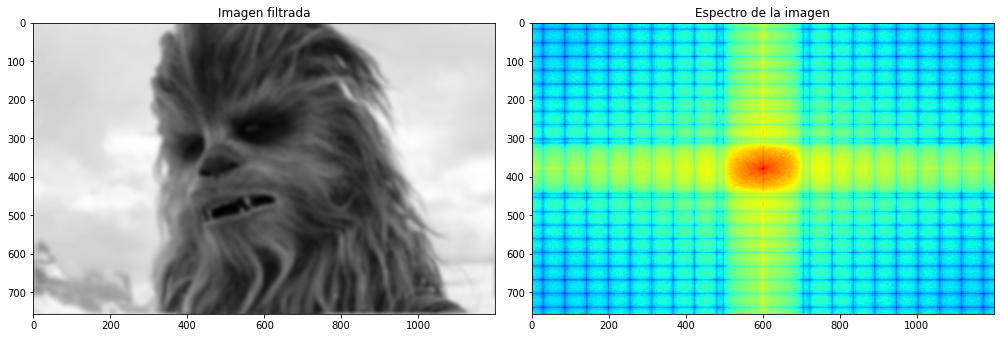

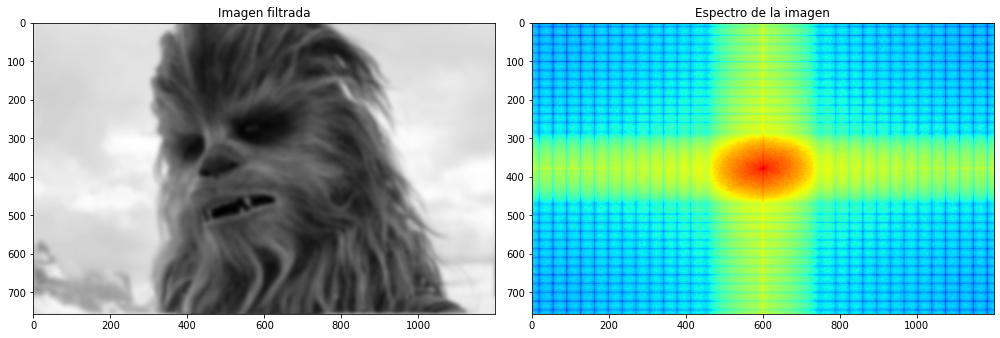

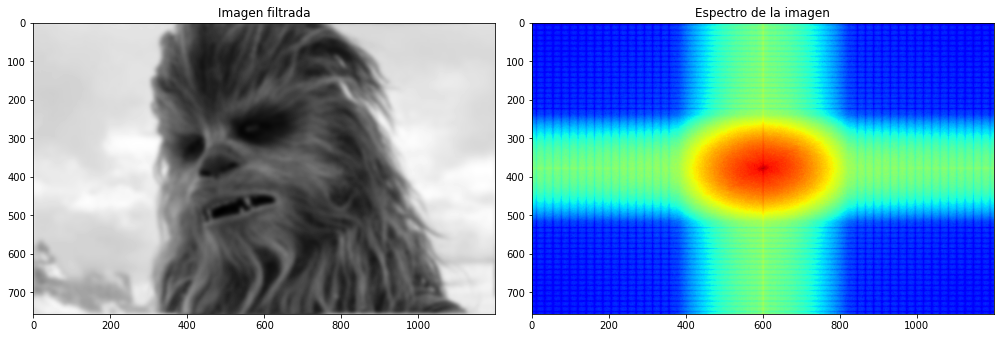

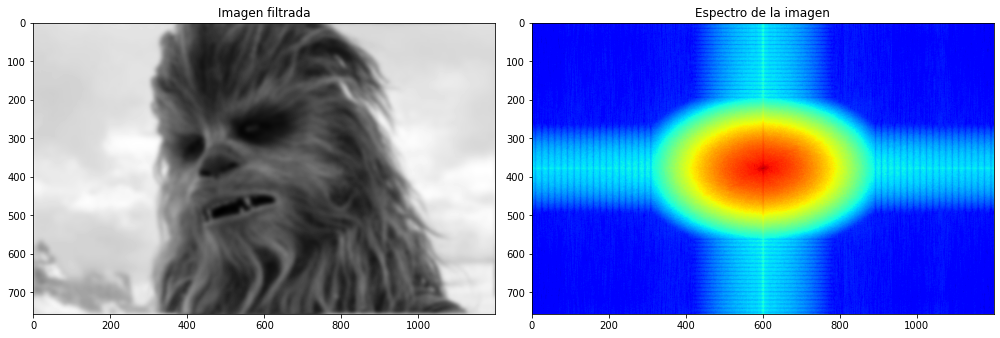

In [133]:
for [img_fft, img_gauss] in images_tf:
    
    plt.figure(figsize=(14,8))

    plt.subplot(1,2,1)
    plt.title(f'Imagen filtrada')
    plt.imshow(img_gauss, cmap='gray')
    
    plt.subplot(1,2,2)
    plt.title(f'Espectro de la imagen')
    tf_shifted = np.fft.fftshift(img_fft)
    plt.imshow(20*np.log(np.abs(tf_shifted)), cmap='jet')
    
    plt.tight_layout()

2. Usando el método descripto en el paper Image Sharpness Measure for Blurred Images in Frequency Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral

3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of focus measure operators in shape from focus”